In [23]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import os 
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

current_directory = os.getcwd()

output_path = f"{current_directory}/plots/"
os.makedirs(output_path, exist_ok=True)
cohort = '86_A'
# pi = pd.read_excel('LungData/LUAD Clinical Data.xlsx')
# cd = pd.read_csv('celldata/20240208_cell+patient_info.csv')
# totalscid = pd.read_csv('total_scid.csv')




In [3]:
# Static color cell type pairing for all plots

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']
colors = colors[:13]
# cts = ['CAF', 'Other', 'normal', 'CD8', 'hypoxic', 'Myeloid', 'CD4',
    #    'Blood', 'Lymphatic', 'HEV', 'Bcell', 'CD4_Treg', 'Neutrophil']


cts = ['CAF',
 'HEV',
 'Blood',
 'Lymphatic',
 'Myeloid',
 'Neutrophil',
 'Bcell',
 'CD8',
 'CD4',
 'CD4_Treg',
 'normal',
 'hypoxic',
 'Other']


In [28]:
freqpath = f"{current_directory}/freq_table/freqdf_{cohort}_240222.csv"
freq = pd.read_csv(freqpath)

path = f"{current_directory}/distance_calcs/20240222_86_A_allacID_25px_neighbours_distanceCalculation_allCells.csv"
dists = pd.read_csv(path)
dists['source_cluster'].value_counts()

source_cluster
normal        1513118
CAF            883456
hypoxic        573752
Other          369696
Myeloid        312046
CD8            215086
Bcell          143671
Neutrophil     136167
CD4            116857
Blood           64808
Lymphatic       32813
CD4_Treg        18103
HEV              5585
Name: count, dtype: int64

In [29]:
freq

,acID,Patient_ID,source_ID,source_cluster,Bcell,Blood,CAF,CD4,CD4_Treg,CD8,HEV,Lymphatic,Myeloid,Neutrophil,Other,hypoxic,normal
0,1,86_1,86_A_1_1,Other,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,86_1,86_A_1_10,Other,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,0.444444
2,1,86_1,86_A_1_100,normal,0.000000,0.000000,0.285714,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.071429,0.000000,0.642857
3,1,86_1,86_A_1_1000,normal,0.000000,0.000000,0.200000,0.000000,0.0,0.100000,0.0,0.000000,0.000000,0.000000,0.100000,0.100000,0.500000
4,1,86_1,86_A_1_1001,CD8,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250414,112,86_56,86_A_112_995,Other,0.000000,0.000000,0.071429,0.000000,0.0,0.214286,0.0,0.000000,0.071429,0.000000,0.285714,0.071429,0.285714
250415,112,86_56,86_A_112_996,Other,0.000000,0.083333,0.166667,0.083333,0.0,0.083333,0.0,0.083333,0.000000,0.000000,0.416667,0.000000,0.083333
250416,112,86_56,86_A_112_997,Other,0.269231,0.038462,0.038462,0.000000,0.0,0.076923,0.0,0.000000,0.038462,0.230769,0.269231,0.000000,0.038462
250417,112,86_56,86_A_112_998,Other,0.000000,0.000000,0.461538,0.000000,0.0,0.000000,0.0,0.000000,0.076923,0.000000,0.307692,0.000000,0.153846


In [9]:
# Check for no auto neighbours
dists[dists['source_ID'] == dists['target_ID']]


,source_ID,target_ID,distance,source_X,source_Y,target_X,target_Y,source_cluster,target_cluster,acID,Patient_ID


In [6]:
count_df = dists.groupby(['acID', 'Patient_ID','source_ID','source_cluster', 'target_cluster']).size().reset_index(name='count')
total_counts_scid = count_df.groupby(['acID', 'Patient_ID','source_ID','source_cluster'])['count'].sum().reset_index(name='total_scid')

total_counts_scid

,acID,Patient_ID,source_ID,source_cluster,total_scid
0,1,86_1,86_A_1_1,Other,1
1,1,86_1,86_A_1_10,Other,9
2,1,86_1,86_A_1_100,normal,14
3,1,86_1,86_A_1_1000,normal,10
4,1,86_1,86_A_1_1001,CD8,6
...,...,...,...,...,...
250414,112,86_56,86_A_112_995,Other,14
250415,112,86_56,86_A_112_996,Other,12
250416,112,86_56,86_A_112_997,Other,26
250417,112,86_56,86_A_112_998,Other,13


In [7]:
# Investigate same celltype bias furtheer #TODO
filtered_rows = count_df[count_df['source_cluster'] == count_df['target_cluster']]
filtered_rows


,acID,Patient_ID,source_ID,source_cluster,target_cluster,count
1,1,86_1,86_A_1_10,Other,Other,5
5,1,86_1,86_A_1_100,normal,normal,9
10,1,86_1,86_A_1_1000,normal,normal,5
14,1,86_1,86_A_1_1002,CAF,CAF,3
19,1,86_1,86_A_1_1003,CAF,CAF,6
...,...,...,...,...,...,...
921335,112,86_56,86_A_112_995,Other,Other,4
921343,112,86_56,86_A_112_996,Other,Other,5
921351,112,86_56,86_A_112_997,Other,Other,7
921355,112,86_56,86_A_112_998,Other,Other,4


In [ ]:
count_df['']

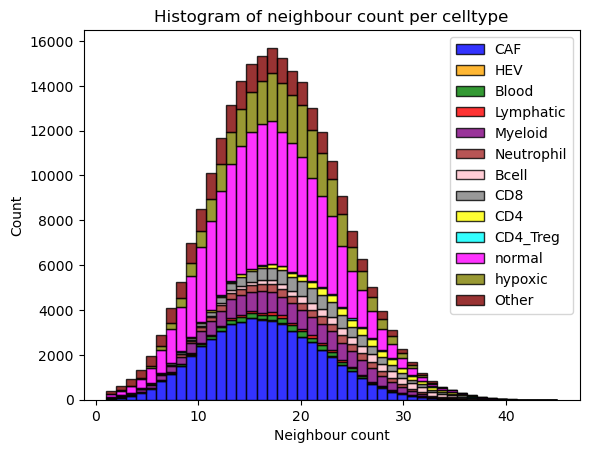

In [19]:
# CT specific histogram
mat = []
for ct in cts:
    tempdf = total_counts_scid[total_counts_scid['source_cluster'] == ct]['total_scid']
    mat.append(tempdf)

labels = cts
plt.hist(mat, 45,
         histtype='bar',
         stacked=True,  
         fill=True,
         label=cts,
         alpha=0.8, # opacity of the bars
         color=colors,
         edgecolor = "k")

plt.xlabel('Neighbour count')
plt.ylabel('Count')
plt.title('Histogram of neighbour count per celltype')
plt.legend()
plt.savefig(f'{output_path}nb_count_histogram_per_ct.png', bbox_inches='tight')

plt.show()

In [10]:
# Cell neighbour count mean
total_counts_scid['total_scid'].mean()

19.480552046994337

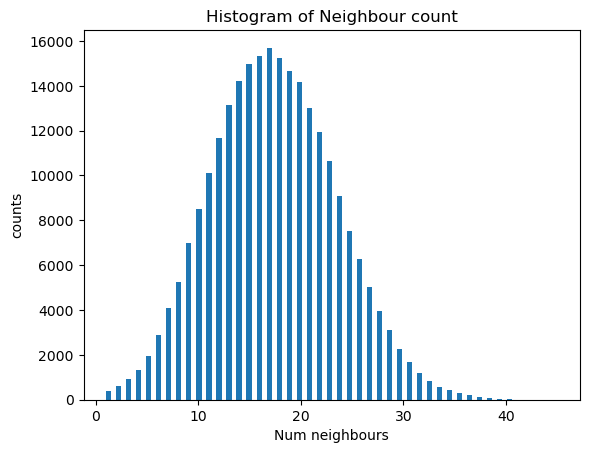

In [20]:
# Aggregated histogram
# 37 for 25px dist
plt.hist(total_counts_scid['total_scid'], bins=45, width=0.5)
plt.xlabel('Num neighbours')
plt.ylabel('counts')
plt.title('Histogram of Neighbour count')
plt.savefig(f'{output_path}nb_count_histogram_agg.png', bbox_inches='tight')

plt.show()

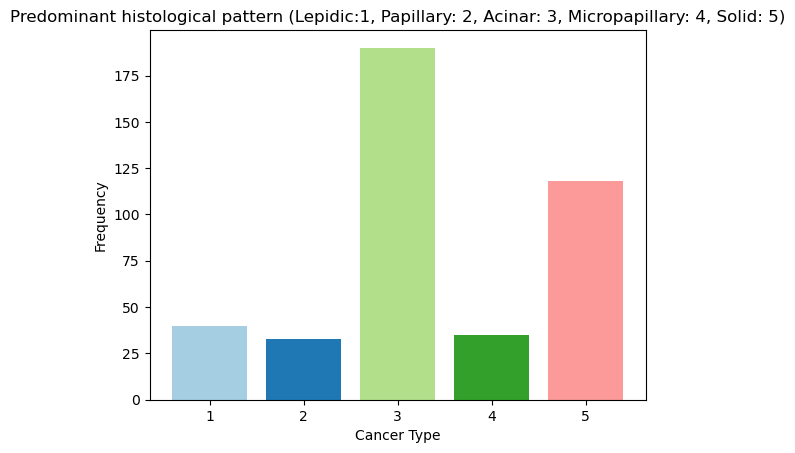

In [9]:
hist_pat = pi['Predominant histological pattern (Lepidic:1, Papillary: 2, Acinar: 3, Micropapillary: 4, Solid: 5)']
type_counts = hist_pat.value_counts().sort_index()

# Plot single bar with different colors for each cancer type
plt.bar(range(len(type_counts)), type_counts, color=plt.cm.Paired(range(len(type_counts))))

plt.xticks(range(len(type_counts)), type_counts.index)
plt.xlabel('Cancer Type')
plt.ylabel('Frequency')
plt.title('Predominant histological pattern (Lepidic:1, Papillary: 2, Acinar: 3, Micropapillary: 4, Solid: 5)')

plt.savefig(f'{output_path}cancertype.png', bbox_inches='tight')

plt.show()

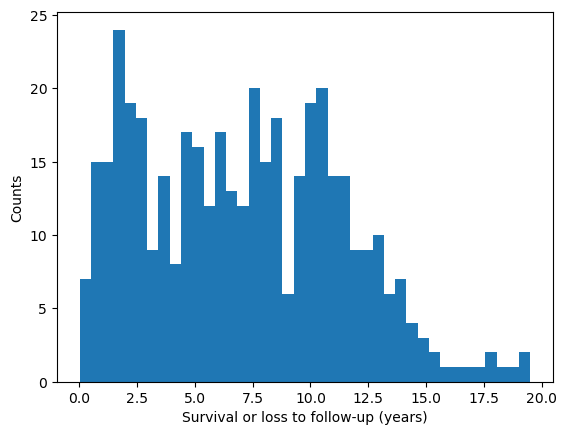

In [10]:
plt.hist(pi['Survival or loss to follow-up (years)'], bins=40)

plt.xlabel('Survival or loss to follow-up (years)')
plt.ylabel('Counts')

plt.savefig(f'{output_path}survival_loss_years.png', bbox_inches='tight')

plt.show()

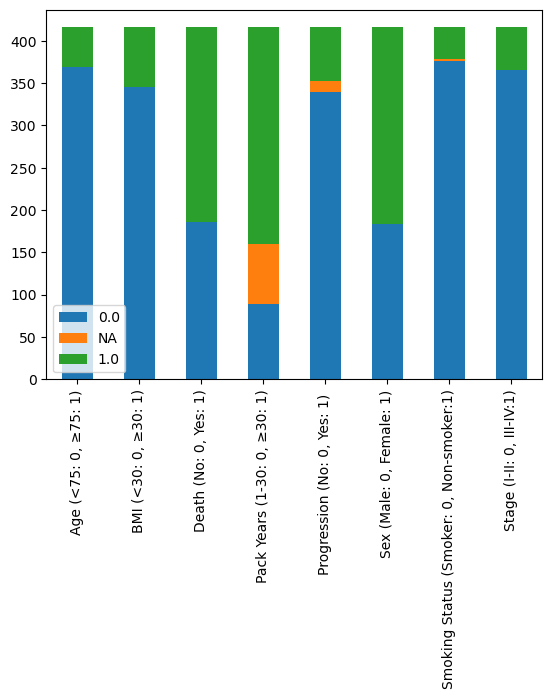

In [11]:
# plot ratios of binary features
bi_pi = pi.iloc[:,1:-2]
bipi2 = bi_pi.stack().groupby(level=[1]).value_counts().unstack()
bipi2['NA'] = 416 - bipi2[list(bipi2.columns)].sum(axis=1)
stack_order = [0,'NA',1]
bipi2 = bipi2[stack_order]
bipi2.plot.bar(rot=90, stacked=True)
plt.savefig(f'{output_path}bicols_ratio.png', bbox_inches='tight')

plt.show()


In [12]:
# Missing segmentation accounts for difference cd and freq
print("Df size for freq and cd respectively:",len(freq), len(cd))
print('Nans in cd:\n',cd.isna().sum())


Df size for freq and cd respectively: 1507024 1640317
Nans in cd:
 x_pix                                                                                                      0
y_pix                                                                                                      0
celltype                                                                                              129599
Key                                                                                                        0
Sex (Male: 0, Female: 1)                                                                                   0
Age (<75: 0, ≥75: 1)                                                                                       0
BMI (<30: 0, ≥30: 1)                                                                                       0
Smoking Status (Smoker: 0, Non-smoker:1)                                                                8117
Pack Years (1-30: 0, ≥30: 1)                                 

In [13]:
permutation_frac = pd.DataFrame(freq['source_cluster'].value_counts()/len(freq))
permutation_frac.rename(columns={'count': 'Random_Permutation'}, inplace=True)
permutation_frac

,Random_Permutation
source_cluster,
Cancer,0.486264
Cl MAC,0.102735
Th,0.098008
Endothelial cell,0.071718
Tc,0.065179
B cell,0.041725
Neutrophils,0.028037
Alt MAC,0.026084
Cl Mo,0.024885


In [30]:
input_path = f"{current_directory}/tma_dfs/"

celldata = pd.read_csv(f"{input_path}cd_{cohort}_clusters.csv")
celldata

,Unnamed: 0,TmaID,TmaBlock,acID,ImageNumber,ObjectNumber,cellID,source_cluster,cell_subtype,Patient_ID,Location_Center_X,Location_Center_Y
0,0,86,A,1,1,4,86_A_1_4,CAF,Collagen_CAF,86_1,337.611111,20.500000
1,1,86,A,1,1,7,86_A_1_7,CAF,hypoxic_CAF,86_1,370.000000,20.500000
2,2,86,A,1,1,27,86_A_1_27,CAF,mCAF,86_1,352.210526,41.203947
3,3,86,A,1,1,29,86_A_1_29,CAF,Collagen_CAF,86_1,343.823529,37.882353
4,4,86,A,1,1,31,86_A_1_31,CAF,hypoxic_CAF,86_1,240.145833,40.104167
...,...,...,...,...,...,...,...,...,...,...,...,...
250743,5964591,86,A,93,90,1987,86_A_93_1987,Other,Other,86_36,399.166667,433.000000
250744,5964592,86,A,93,90,2522,86_A_93_2522,Other,Other,86_36,410.324324,548.945946
250745,5964593,86,A,93,90,2604,86_A_93_2604,Other,Other,86_36,455.851852,566.777778
250746,5964594,86,A,96,93,354,86_A_96_354,Other,Other,86_48,655.200000,476.600000


In [39]:
freq.iloc[:,2:]

,source_ID,source_cluster,Bcell,Blood,CAF,CD4,CD4_Treg,CD8,HEV,Lymphatic,Myeloid,Neutrophil,Other,hypoxic,normal
0,86_A_1_1,Other,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,86_A_1_10,Other,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,0.444444
2,86_A_1_100,normal,0.000000,0.000000,0.285714,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.071429,0.000000,0.642857
3,86_A_1_1000,normal,0.000000,0.000000,0.200000,0.000000,0.0,0.100000,0.0,0.000000,0.000000,0.000000,0.100000,0.100000,0.500000
4,86_A_1_1001,CD8,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250414,86_A_112_995,Other,0.000000,0.000000,0.071429,0.000000,0.0,0.214286,0.0,0.000000,0.071429,0.000000,0.285714,0.071429,0.285714
250415,86_A_112_996,Other,0.000000,0.083333,0.166667,0.083333,0.0,0.083333,0.0,0.083333,0.000000,0.000000,0.416667,0.000000,0.083333
250416,86_A_112_997,Other,0.269231,0.038462,0.038462,0.000000,0.0,0.076923,0.0,0.000000,0.038462,0.230769,0.269231,0.000000,0.038462
250417,86_A_112_998,Other,0.000000,0.000000,0.461538,0.000000,0.0,0.000000,0.0,0.000000,0.076923,0.000000,0.307692,0.000000,0.153846


7
8
6
5


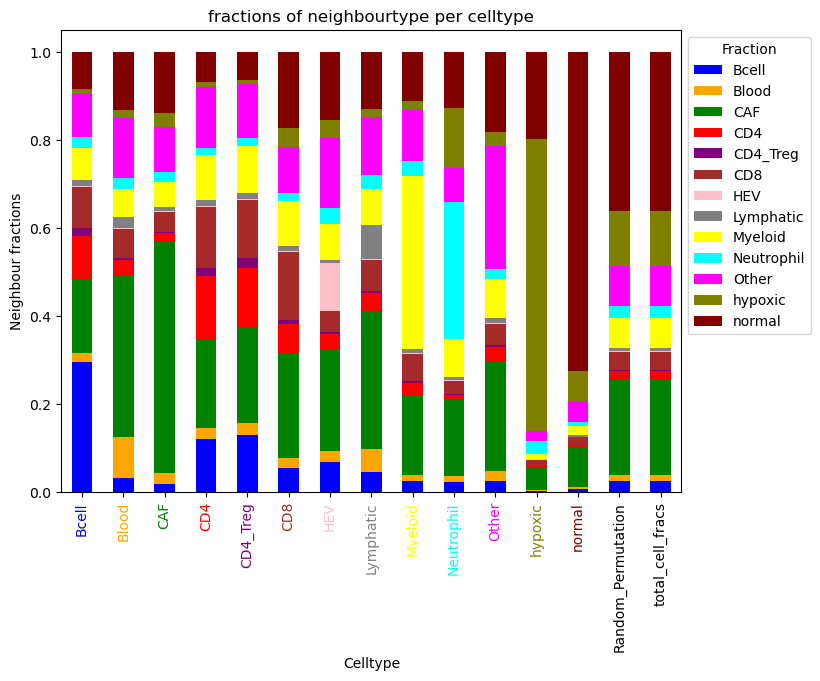

In [40]:
# Create a stacked barplot

allcells = celldata['source_cluster']
print(7)
clustered = freq.iloc[:,3:].groupby(['source_cluster']).mean()
print(8)
cts = clustered.columns
print(6)
# Add optional permutation bar and allcellsfrac bar
permutation_frac = pd.DataFrame(freq['source_cluster'].value_counts()/len(freq))
permutation_frac.rename(columns={'count': 'Random_Permutation'}, inplace=True)
clustered = pd.merge(clustered.T, permutation_frac, left_index=True, right_index=True).T

print(5)
cellsum = allcells.value_counts().sum()
allcells_frac = pd.DataFrame(allcells.value_counts()/cellsum)
allcells_frac.columns=['total_cell_fracs']
clustered = pd.merge(clustered.T, allcells_frac, left_index=True, right_index=True).T



# ---

ax = clustered.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))
ax.set_xlabel('Celltype')
# Set the color of each x-axis label, edit the index if no perm and frac bars
for i, label in enumerate(ax.get_xticklabels()[:-2]):
    label.set_color(colors[i])


ax.set_ylabel('Neighbour fractions')
ax.set_title('fractions of neighbourtype per celltype')
plt.legend(title='Fraction', bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig(f'{output_path}nb_fracs_sorin.png', bbox_inches='tight')

plt.show()


In [41]:

nbbias_df = clustered.iloc[-2:]
nbbias_df.T

,Random_Permutation,total_cell_fracs
Bcell,0.023828,0.023801
Blood,0.014683,0.014692
CAF,0.216673,0.216484
CD4,0.019647,0.019621
CD4_Treg,0.002939,0.002935
CD8,0.041431,0.041376
HEV,0.001501,0.001504
Lymphatic,0.007084,0.007079
Myeloid,0.067719,0.067662
Neutrophil,0.027378,0.027374
